In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [4]:
ca = cerberus.read('cerberus_annot_triplets.h5')
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'

mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte']
mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2'}
subset = {'source': ['v40', 'obs_det', 'sample_major']}

## Det isoforms

0.4
12.0
(2.1431999999999998, 2.0)


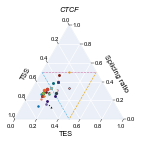

In [10]:
# CTCF
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CTCF',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_det']},
            size_scale=0.2,
            fname='figures/simplex_ctcf.pdf')

## Major isoforms

10
300
(10.716, 10)


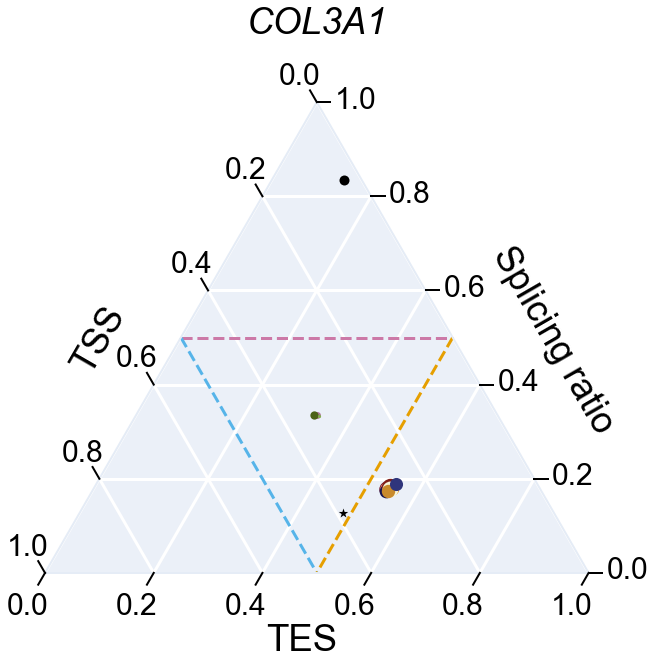

In [16]:
# COL3A1
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='COL3A1',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=1,
            fname='figures/simplex_col3a1_major.pdf')

10
300
(10.716, 10)


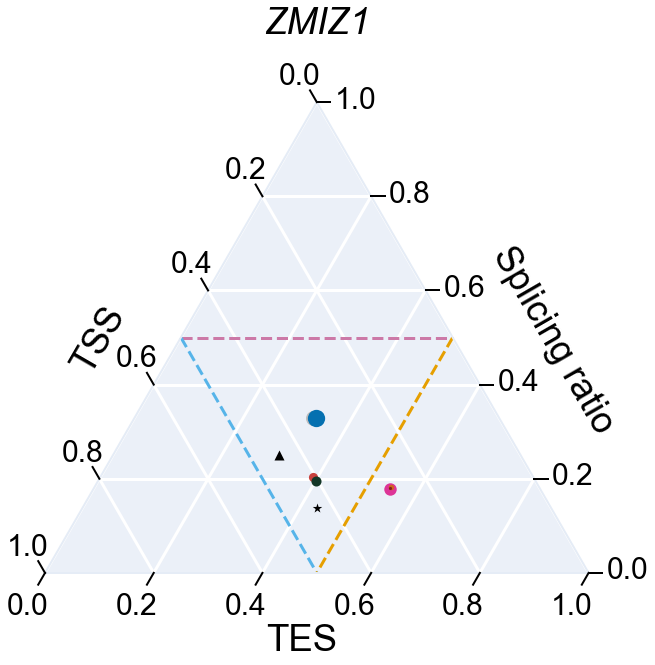

In [6]:
# ctcf
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CTCF',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=1,
            fname='figures/simplex_ctcf_major.pdf')

In [7]:
df

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm,tss_ratio,tes_ratio,spl_ratio,a_jitter,b_jitter,c_jitter,gene_tpm_log
37743,v40,ENSG00000108175,3.0,3.0,3.0,3.0,1.000000,ZMIZ1,v40,NaN,0.428571,0.428571,0.142857,0.429262,0.138837,0.431615,NaN
3394,obs_det,ENSG00000108175,3.0,2.0,4.0,7.0,1.600000,ZMIZ1,obs_det,NaN,0.454545,0.303030,0.242424,0.452502,0.249641,0.305652,NaN
75982,sample_major,ENSG00000108175,1.0,1.0,1.0,1.0,1.000000,ZMIZ1,hl60_m0,177.227692,0.333333,0.333333,0.333333,0.332938,0.328841,0.328613,2.248532
175521,sample_major,ENSG00000108175,1.0,1.0,1.0,1.0,1.000000,ZMIZ1,pc9,37.163689,0.333333,0.333333,0.333333,0.330775,0.335324,0.332548,1.570119
226677,sample_major,ENSG00000108175,1.0,1.0,1.0,1.0,1.000000,ZMIZ1,h1,26.024576,0.333333,0.333333,0.333333,0.336448,0.335075,0.335850,1.415384
293625,sample_major,ENSG00000108175,1.0,2.0,1.0,2.0,0.666667,ZMIZ1,hl60_m1_72hr,92.136871,0.272727,0.545455,0.181818,0.275161,0.179211,0.544955,1.964433
304675,sample_major,ENSG00000108175,1.0,2.0,1.0,2.0,0.666667,ZMIZ1,wtc11,28.469118,0.272727,0.545455,0.181818,0.269344,0.182725,0.544794,1.454374
340991,sample_major,ENSG00000108175,2.0,2.0,2.0,4.0,1.000000,ZMIZ1,h1_de,47.536800,0.400000,0.400000,0.200000,0.405090,0.203286,0.392096,1.677030
355445,sample_major,ENSG00000108175,1.0,1.0,1.0,1.0,1.000000,ZMIZ1,hl60_m2_72hr,359.247009,0.333333,0.333333,0.333333,0.333049,0.329909,0.332759,2.555393
453667,sample_major,ENSG00000108175,2.0,2.0,2.0,4.0,1.000000,ZMIZ1,ocily7,55.780354,0.400000,0.400000,0.200000,0.399472,0.196116,0.400881,1.746481
